SCALCS is designed to calculate and display variuos properties of ion channels as described in several papers (see references in SCALCS main page).

##### Some general settings

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
my_colour = ["r", "g", "b", "m", "c", "y"]
import numpy as np

In [2]:
from scalcs import scalcsio
from scalcs.samples import samples
from scalcs import version
from scalcs import scalcslib as scl
from scalcs import scplotlib as scpl
from scalcs import popen
from scalcs import scburst
from scalcs import cjumps

##### Define a mechanism

First, all calculations here require to specify a mechanism and give values for the rate constants (i.e. to define the $Q$ matrix).  Different ways to do that are shown elsehere (... when ready ...).  
In this notebook a mechanism used as the numerical example by Colquhoun & Hawkes 1982 is loaded from DCPYPS. 

In [3]:
filename = '../scalcs/samples/samples.xlsx'
demomec = scalcsio.load_from_excel_sheet(filename)
#demomec = samples.CH82()
print(demomec)


class dcpyps.Mechanism
Values of unit rates [1/sec]:
0	From AR  	to ARS    	beta1   	15
1	From A2R  	to A2RS    	beta2   	15000
2	From ARS  	to AR    	alpha1   	3000
3	From A2RS  	to A2R    	alpha2   	500
4	From AR  	to R    	k(-1)   	2000
5	From A2R  	to AR    	2k(-2)   	4000
6	From R  	to AR    	2k(+1)   	100000000.0
7	From ARS  	to A2RS    	k*(+2)   	500000000.0
8	From AR  	to A2R    	k(+2)   	500000000.0
9	From A2RS  	to ARS    	2k*(-2)   	0.66667

Conductance of state ARS (pS)  =      60

Conductance of state A2RS (pS)  =      60

Number of open states = 2
Number of short-lived shut states (within burst) = 2
Number of long-lived shut states (between bursts) = 1
Number of desensitised states = 0

Number of cycles = 1
Cycle 0 is formed of states: A2RS  ARS  AR  A2R  
	forward product = 1.500007500e+16
	backward product = 1.500000000e+16


Define temporal resolution, $t_{res}$, for current calculations.

In [4]:
tres = 50e-6  # resolution in seconds

Set agonist concentration:

In [5]:
conc = 100e-9    # 100 nM
demomec.set_eff('c', conc)

Calculate and display equilibrium occupancies and lifetime of states.

In [6]:
print(scl.printout_occupancies(demomec, tres))




*******************************************

Open	Equilibrium	Mean life	Mean latency (ms)
state	occupancy	(ms)	to next shutting
			given start in this state
Subset A 	0.001898	1.8791
1	2.442e-05	0.32787	0.36066
2	0.0018736	2	2

Shut	Equilibrium	Mean life	Mean latency (ms)
state	occupancy	(ms)	to next opening
			given start in this state
Subset B 	0.0050277	0.45954
3	0.0049654	0.48426	3689.9
4	6.2372e-05	0.052632	776.87

Subset C 	0.99307	100
5	0.99307	100	3789.9


Initial vector for HJC openings phiOp =
	0.11832	0.88168
Initial vector for ideal openings phiOp =
	0.073738	0.92626
Initial vector for HJC shuttings phiSh =
	0.31362	0.66298	0.023395
Initial vector for ideal shuttings phiSh =
	0.072529	0.92747	0



##### Open and shut time distributions

Calculate ideal and asymptotic distributions for both open and shut dwell times. 

In [7]:
print(scl.printout_distributions(demomec, tres))


*******************************************
IDEAL OPEN TIME DISTRIBUTION
term	w	rate (1/sec)	tau (ms)	area (%)
1	463.85	500	2	92.771
2	220.49	3050	0.32787	7.2292
Mean (ms) =	 1.8791	SD =	 1.9764	SD/mean =	 1.0518

ASYMPTOTIC OPEN TIME DISTRIBUTION
term	tau (ms)	area (%)	rate const (1/sec)
1	0.32812	11.61	3047.7
2	3.8973	88.388	256.59
Areas for asymptotic pdf renormalised for t=0 to    infinity (and sum=1), so areas can be compared with ideal pdf.
1	13.121
2	86.879
Mean open time (ms) = 3.6328

EXACT OPEN TIME DISTRIBUTION
eigen	g00(m)	g10(m)	g11(m)
3.4038e-15	0.55632	2.0213	0.30949
101.19	223.68	-2.8694	33940
2022.1	10.528	8.5253	374.09
3093.5	342.42	-9.3624	-12928
19408	4.6398	1.6851	-696.28


*******************************************
IDEAL SHUT TIME DISTRIBUTION
term	w	rate (1/sec)	tau (ms)	area (%)
1	0.068813	0.2639	3789.4	26.076
2	17.191	2062.9	0.48475	0.83333
3	13896	19012	0.052599	73.091
Mean (ms) =	 988.15	SD =	 2551.9	SD/mean =	 2.5825

ASYMPTOTIC SHUT TIME DISTRIBUTION
term

Display open time distribution:

RED- ideal distribution
GREEN- HJC distribution (corrected for missed events)


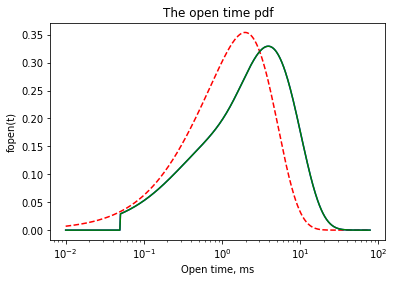

In [8]:
t, ipdf, epdf, apdf = scpl.open_time_pdf(demomec, tres)
plt.semilogx(t, ipdf, 'r--', t, epdf, 'b-', t, apdf, 'g-')
plt.ylabel('fopen(t)')
plt.xlabel('Open time, ms')
plt.title('The open time pdf')
print('RED- ideal distribution\nGREEN- HJC distribution (corrected for missed events)')

Display shut time distribution:

RED- ideal distribution
GREEN- HJC distribution (corrected for missed events)


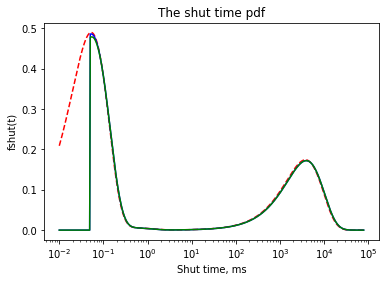

In [9]:
t, ipdf, epdf, apdf = scpl.shut_time_pdf(demomec, tres)
plt.semilogx(t, ipdf, 'r--', t, epdf, 'b-', t, apdf, 'g-')
plt.ylabel('fshut(t)')
plt.xlabel('Shut time, ms')
plt.title('The shut time pdf')
print('RED- ideal distribution\nGREEN- HJC distribution (corrected for missed events)')

Calculate and display open, shut and open/shut time correlations:

In [10]:
print(scl.printout_correlations(demomec))



*************************************
CORRELATIONS
kA, kF = 2, 3
Ranks of GAF, GFA = 2, 2
Rank of GFA * GAF = 2
Eigenvalues of GFA * GAF:
	0	1	0.21383
Rank of GAF * GFA = 2
Eigenvalues of GAF * GFA:
	0.21383	1

 OPEN - OPEN TIME CORRELATIONSVariance of open time = 3.9061e-06
SD of all open times = 1.9764 ms
SD of means of 50 open times ifuncorrelated = 0.2795 ms
Actual SD of mean = 0.28026 ms
Percent difference as result of correlation = 0.27172
Limiting value of percent difference for large n = 1.2973
Correlation coefficients, r(k), for up to lag k = 5:
r(1) = 0.010265
r(2) = 0.002195
r(3) = 0.00046934
r(4) = 0.00010036
r(5) = 2.1459e-05

 SHUT - SHUT TIME CORRELATIONS
Variance of shut time = 6.5122
SD of all shut times = 2551.9 ms
SD of means of 50 shut times ifuncorrelated = 360.89 ms
Actual SD of mean = 369.18 ms
Percent difference as result of correlation = 2.297
Limiting value of percent difference for large n = 1.225e+09
Correlation coefficients, r(k), for up to k = 5 lags:
r(

C:\DCPROGS\SCALCS\scalcs\scalcslib.py:1527: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  rGAF, rGFA = np.rank(GAF), np.rank(GFA)
C:\DCPROGS\SCALCS\scalcs\scalcslib.py:1530: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  rXFF = np.rank(XFF)
C:\DCPROGS\SCALCS\scalcs\scalcslib.py:1540: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  rXAA = np.rank(XAA)


Shut time correlation - red circles.
Open time correlation - green circles
Open-shut time correlation - blue circles


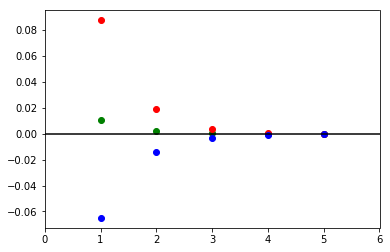

In [11]:
lag = 5
n, roA, roF, roAF = scpl.corr_open_shut(demomec, lag)
plt.plot(n, roA,'go', n, roF, 'ro', n, roAF, 'bo')
plt.axhline(y=0, xmin=0, xmax=1, color='k')
plt.xlim([0, 6])
print( 'Shut time correlation - red circles.\n' +
    'Open time correlation - green circles\n' +
    'Open-shut time correlation - blue circles')

Display open time adjacent to shut time range pdf:


*************************************
 OPEN TIMES ADJACENT TO SPECIFIED SHUT TIME RANGE
PDF of open times that precede shut times between 0.100 and 1.000 ms
term	w	rate (1/sec)	tau (ms)	area (%)
1	36.758	3050	0.32787	1.2052
2	493.97	500	2	98.795
Mean (ms) =	 1.9798	SD =	 1.9966	SD/mean =	 1.0085
Mean from direct calculation (ms) = 1.979848

Ideal open time pdf- red dashed line.
Open times adjacent to shut time range pdf- blue solid line.



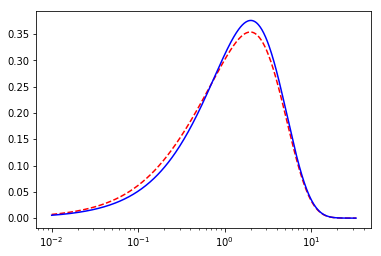

In [12]:
u1, u2 = 0.1e-3, 1e-3 # 1 ms, 10 ms
t, ipdf, ajpdf = scpl.adjacent_open_time_pdf(demomec, tres, u1, u2)
plt.semilogx(t, ipdf, 'r--', t, ajpdf, 'b-')
print(scl.printout_adjacent(demomec, u1, u2))
print('Ideal open time pdf- red dashed line.\n' +
'Open times adjacent to shut time range pdf- blue solid line.\n')

Display mean open time preceding / next-to shut time plot:

Mean open time preceding specified shut time- red dashed line.
Mean open time next to specified shut time- blue dashed line.


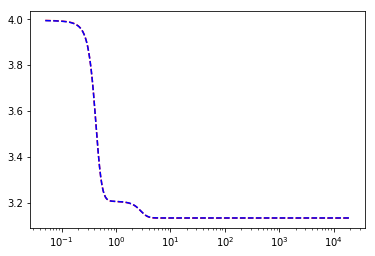

In [13]:
sht, mp, mn = scpl.mean_open_next_shut(demomec, tres)
plt.semilogx(sht, mp, 'r--', sht, mn, 'b--')
print('Mean open time preceding specified shut time- red dashed line.\n' +
'Mean open time next to specified shut time- blue dashed line.')

Display subset time pdf:

In [14]:
state1 = 3
state2 = 4
#t, ipdf, spdf = scpl.subset_time_pdf(demomec, tres, state1, state2)
#plt.semilogx(t, spdf, 'b-', t, ipdf, 'r--')
print('Ideal pdf- red dashed line.\nSubset life time pdf- blue solid line.')

Ideal pdf- red dashed line.
Subset life time pdf- blue solid line.


Display dependency plot:

(-1.0, 1.0)

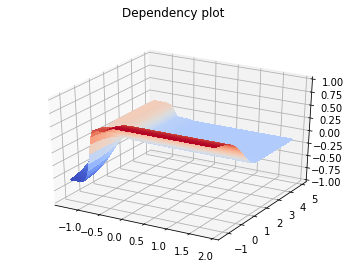

In [15]:
to, ts, d = scpl.dependency_plot(demomec, tres, points=128)
fig = plt.figure()
fig.suptitle('Dependency plot', fontsize=12)
ax = fig.gca(projection='3d')
to, ts = np.meshgrid(to, ts)
surf = ax.plot_surface(to, ts, d, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
ax.set_zlim(-1.0, 1.0)

##### Burst properties

Calculate burst properties

In [16]:
print('Agonist concentration = %e M' %conc)
print(scburst.printout_pdfs(demomec))

Agonist concentration = 1.000000e-07 M

*******************************************
CALCULATED SINGLE CHANNEL BURST PDFS ETC....
Initial vector for burst (phiB) = 
0.27536	0.72464	
End vector for burst (endB) = 
0.96089	0.20494	

Total burst length, unconditional pdf
Fbst(t) =
term	w	rate (1/sec)	tau (ms)	area (%)
1	1.4999	19408	0.051525	0.0077281
2	773.95	3093.3	0.32328	25.02
3	28.725	2012.6	0.49688	1.4273
4	74.26	100.97	9.9036	73.545
Mean (ms) =	 7.3715	SD =	 9.4861	SD/mean =	 1.2869
Mean from direct matrix calc = 7.3715 millisec

Burst length pdf for bursts with 2 or more openings.
Fbst(bst>1) =
term	w	rate (1/sec)	tau (ms)	area (%)
1	2.5556	19408	0.051525	0.013168
2	1318.7	3093.3	0.32328	42.632
3	48.944	2012.6	0.49688	2.4319
4	126.53	100.97	9.9036	125.31
5	-1369.3	3050	0.32787	-44.895
6	-127.46	500	2	-25.493
Mean (ms) =	 11.903	SD =	 10.104	SD/mean =	 0.84886

Number (r) of openings / burst (unconditional)
P(r) =
term	w	rho	area(%)	Norm mean1	0.26093	0.0071443	26.281	1.0072
2	0.152

Display burst length distribution:

Text(0.5,1,'The burst length pdf')

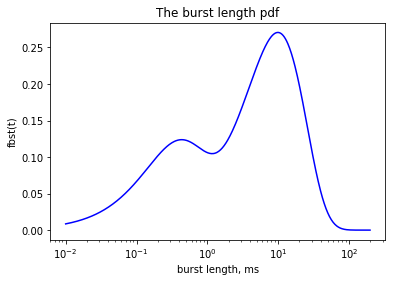

In [17]:
t, fbst = scpl.burst_length_pdf(demomec)
plt.semilogx(t, fbst, 'b-')
plt.ylabel('fbst(t)')
plt.xlabel('burst length, ms')
plt.title('The burst length pdf')

Display the conditional burst length distribution:

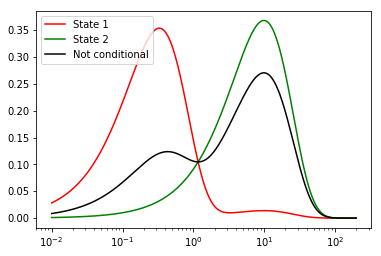

In [18]:
t, fbst, cfbst = scpl.burst_length_pdf(demomec, conditional=True)
plots = []
for i in range(demomec.kA):
    handle, = plt.semilogx(t, cfbst[i], my_colour[i]+'-', label="State {0:d}".format(i+1))
    plots.append(handle)
handle, = plt.semilogx(t, fbst, 'k-', label="Not conditional")
plots.append(handle)
plt.legend(handles=plots)

Display the distribution of number of openings per burst:

(0, 11)

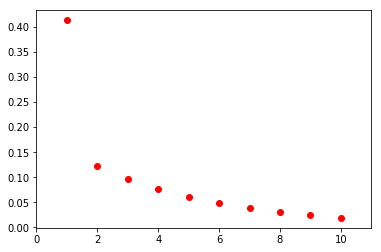

In [19]:
n = 10
r, Pr = scpl.burst_openings_pdf(demomec, n)
plt.plot(r, Pr,'ro')
plt.xlim([0, 11])

 Display the conditional distribution of number of openings per burst:

(0, 11)

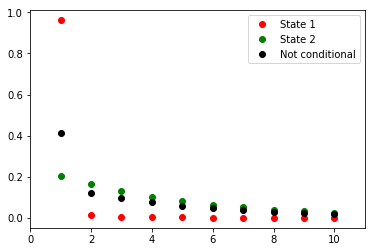

In [20]:
n = 10
r, Pr, cPr = scpl.burst_openings_pdf(demomec, n, conditional=True)
plots = []
for i in range(demomec.kA):
    handle, = plt.plot(r, cPr[i], my_colour[i]+'o', label="State {0:d}".format(i+1))
    plots.append(handle)
handle, = plt.plot(r, Pr,'ko', label="Not conditional")
plots.append(handle)
plt.legend(handles=plots)
plt.xlim([0, n+1])

  Display mean burst length versus concentration plot:

Solid line: mean burst length versus concentration.    X-axis: microMols; Y-axis: ms.


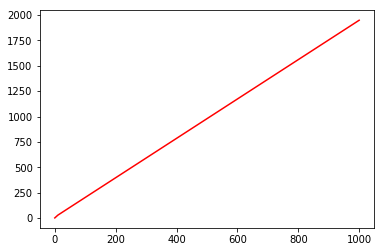

In [21]:
cmin = 10e-9
cmax = 1e-3
c, br, brblk = scpl.burst_length_versus_conc_plot(demomec, cmin, cmax)
plt.plot(c, br,'r-')
print('Solid line: mean burst length versus concentration.' + '    X-axis: microMols; Y-axis: ms.')

##### $P_{open}$ curve

Calculate Popen curve parameters:

In [22]:
print(popen.printout(demomec, tres))


*******************************************
Popen CURVE

HJC Popen curve:
maxPopen = 0.95268;  EC50 = 2.3399 microM;  nH = 1.8886
Ideal Popen curve:
maxPopen = 0.96774;  EC50 = 2.3982 microM;  nH = 1.891


Display $P_{open}$ curve:

RED- ideal curve
BLUE- apparent curve (corrected for missed events)


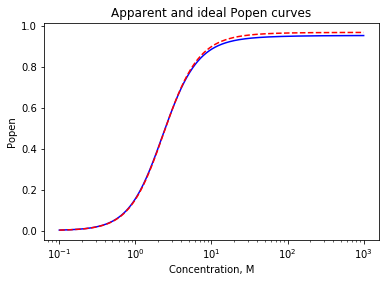

In [23]:
c, pe, pi = scpl.Popen(demomec, tres)
plt.semilogx(c, pe, 'b-', c, pi, 'r--')
plt.ylabel('Popen')
plt.xlabel('Concentration, M')
plt.title('Apparent and ideal Popen curves')
print('RED- ideal curve\nBLUE- apparent curve (corrected for missed events)')

##### Macroscopic response to agonist concentration pulse

Define a realistic profile of concentration pulse:

In [24]:
# Here one can tweak the parameters of the jump.
step_size = 8e-6 # The sample step. All time parameters in seconds
pulse_centre = 10e-3
rise_time = 250e-6 # 10-90% rise time for error functions
pulse_width = 10e-3
record_length = 50e-3
peak_conc = 10e-6    # in M
baseline_conc = 0.0
cjargs = (peak_conc, baseline_conc, pulse_centre, pulse_width,
            rise_time, rise_time)
cfunc = cjumps.pulse_erf

GREEN- concentration pulse profile
BLUE- open probability profile


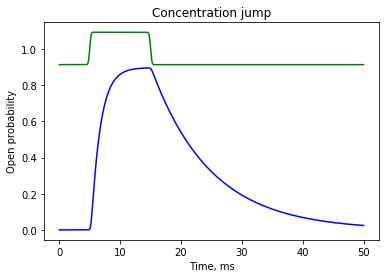

In [25]:
t, c, P = cjumps.calculate_macro_response(demomec, step_size, record_length, 
                                          cfunc, cjargs, method='direct')
Popen = np.sum(P[: demomec.kA], axis=0)

maxP = max(Popen)
maxC = max(c)
c1 = (c / maxC) * 0.2 * maxP + 1.02 * maxP

plt.plot(t * 1000, Popen,'b-', t * 1000, c1, 'g-')
plt.ylabel('Open probability')
plt.xlabel('Time, ms')
plt.title('Concentration jump')
print('GREEN- concentration pulse profile\nBLUE- open probability profile')

Calculate properties of a macroscopic response to an ideal square pulse:

In [26]:
print (cjumps.printout(demomec, peak_conc, pulse_width))


*******************************************
CONCENTRATION JUMPS

Equilibrium occupancies before t=0, at concentration = 0.0:
p00(1) = -0
p00(2) = -0
p00(3) = -0
p00(4) = -0
p00(5) = 1

Equilibrium occupancies at maximum concentration = 0.01 mM:
pinf(1) = 4.4811e-05
pinf(2) = 0.89833
pinf(3) = 0.023899
pinf(4) = 0.029929
pinf(5) = 0.047797

Occupancies at the end of 10 ms pulse:
pt(1) = 4.5188e-05
pt(2) = 0.89702
pt(3) = 0.024083
pt(4) = 0.029944
pt(5) = 0.048909

ON-RELAXATION for ideal step:
Time course for current

Comp	Eigen		Tau (ms)
1	-20828		0.048012	
2	-8018.1		0.12472	
3	-6000.9		0.16664	
4	-668.05		1.4969	

Ampl.(t=0,pA)	Rel.ampl.		Area(pC)
0.028944		-0.011552		0.0013897	
-0.0029761		0.0011878		-0.00037117	
-0.37542		0.14983		-0.06256	
2.5055		-1		3.7505	

Weighted On Tau (ms) = 1.4723

Total current at t=0 (pA) = 4.4409e-16
Total current at equilibrium (pA) = -2.1561
Total area (pC) = 0.003689
Current at the end of 10 ms pulse = -2.153

OFF-RELAXATION for ideal step:
Time co